# Pymaceuticals Inc.
---

### Analysis

- Infubinol and Ceftamin have higher tumor volume than Capomulin and Ramicane.
- Tumor volume is strongly corellated with weight of the mice
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
print(len(mouse_metadata))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
occurences=duplicate_rows['Mouse ID'].value_counts()
print(str(occurences))

Mouse ID
g989    10
Name: count, dtype: int64


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# find the duplicate Mouse ID
duplicate_rows = duplicate_rows.reset_index()
print(duplicate_rows['Mouse ID'][0])

g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID']!= duplicate_rows['Mouse ID'][0]]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
print(clean_df['Mouse ID'].nunique())

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
std_var_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(st.sem)

# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.concat([
    mean_tumor_volume.rename('Mean Tumor Volume'),
    median_tumor_volume.rename('Median Tumor Volume'),
    std_var_tumor_volume.rename('Tumor Volume Variance'),
    std_dev_tumor_volume.rename('Tumor Volume Std. Dev.'),
    std_err.rename('Tumor Volume Std. Err.')
], axis = 1) 

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()
df2['median'] = median_tumor_volume
df2['variance'] = std_var_tumor_volume
df2['std_deviation'] = std_dev_tumor_volume
df2['std_err'] = std_err
df2[['mean','median','variance','std_deviation','std_err','count']]

,mean,median,variance,std_deviation,std_err,count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230.0
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178.0
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178.0
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188.0
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186.0
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181.0
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148.0
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228.0
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181.0


## Bar and Pie Charts

In [10]:
# reset index
df2.reset_index(inplace=True)

In [11]:
drug_mouseid= df2[['count','Drug Regimen']]
drug_mouseid = drug_mouseid.sort_values(by='count', ascending=False)

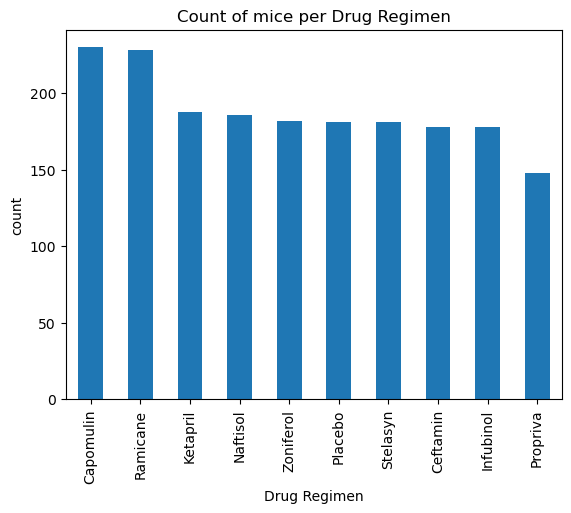

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax = drug_mouseid.plot(kind='bar', x='Drug Regimen', y='count', legend=None)

# Add labels and title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('count')
ax.set_title('Count of mice per Drug Regimen')

# Show the plot
plt.show()


In [13]:
drug_mouseid=drug_mouseid.set_index("Drug Regimen")

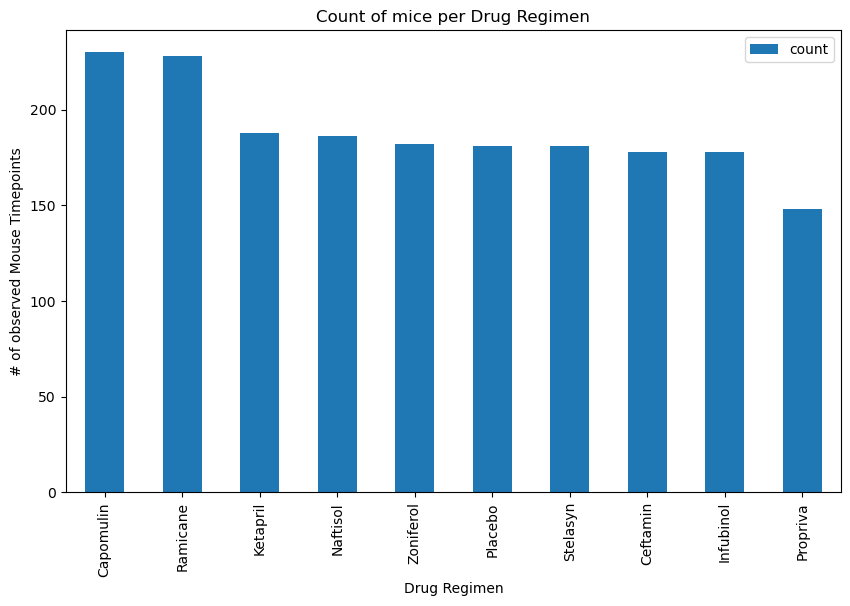

<Figure size 640x480 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Use DataFrame.plot() in order to create a bar chart of the data
drug_mouseid.plot(kind="bar", figsize=(10,6))

# Set a title for the chart
plt.title("Count of mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.show()
plt.tight_layout()

In [15]:
mice_df = clean_df[["Sex"]].groupby("Sex").value_counts()
mice_df = pd.DataFrame(mice_df)
mice_df = mice_df.reset_index()
mice_df

,Sex,count
0,Female,922
1,Male,958


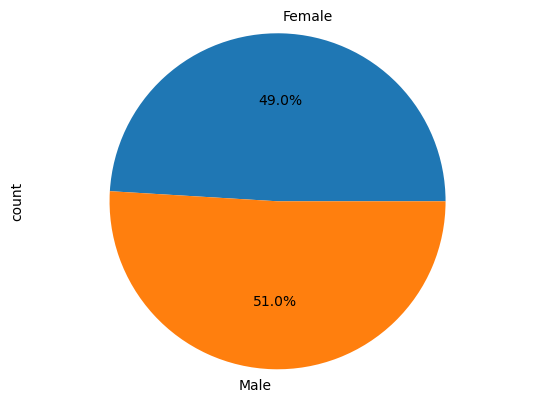

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# The colors of each section of the pie chart
# Plot the pie chart using pandas
ax = mice_df.plot(kind='pie', y='count', labels=mice_df['Sex'], autopct='%1.1f%%', legend=None)
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


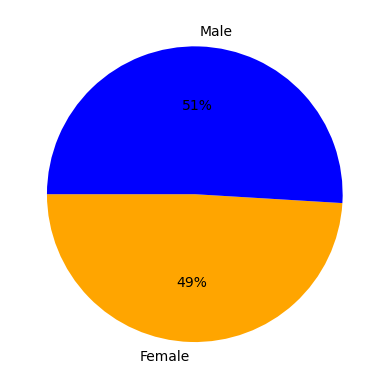

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["orange", "blue"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0)

plt.pie(mice_df["count"], explode=explode, labels=mice_df["Sex"], colors=colors,
        autopct="%0.0f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#df3 = clean_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].max().reset_index()
#df3
# Start by getting the last (greatest) timepoint for each mouse
df4 = clean_df.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().reset_index()
#df4

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df=pd.merge(clean_df,df4,on=["Mouse ID","Drug Regimen","Timepoint"], how="inner")
new_df = merged_mouse_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]]

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]
for x in list_of_treatments:
    tumor_volume.append(new_df[new_df["Drug Regimen"]==x]["Tumor Volume (mm3)"].sum())
#tumor_volume
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
filtered_df = new_df[new_df["Drug Regimen"].isin(list_of_treatments)]

Capomulin = filtered_df[filtered_df["Drug Regimen"] == "Capomulin"]
Ramicane = filtered_df[filtered_df["Drug Regimen"] == "Ramicane"]
Infubinol = filtered_df[filtered_df["Drug Regimen"] == "Infubinol"]
Ceftamin = filtered_df[filtered_df["Drug Regimen"] == "Ceftamin"]


    # add subset 
list_of_dfs=[]
list_of_dfs.append(Capomulin)
list_of_dfs.append(Ramicane)
list_of_dfs.append(Infubinol)
list_of_dfs.append(Ceftamin)

for item in list_of_dfs:
    quartiles = item["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

     # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier = item.loc[(item['Tumor Volume (mm3)'] < lower_bound) | (item['Tumor Volume (mm3)'] > upper_bound)]
    print("Outliers for "+ str(item['Drug Regimen'].head(1)))
    print(outlier[['Tumor Volume (mm3)']])    



Outliers for 39    Capomulin
Name: Drug Regimen, dtype: object
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Outliers for 21    Ramicane
Name: Drug Regimen, dtype: object
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Outliers for 20    Infubinol
Name: Drug Regimen, dtype: object
    Tumor Volume (mm3)
20           36.321346
Outliers for 7    Ceftamin
Name: Drug Regimen, dtype: object
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


<Figure size 800x600 with 0 Axes>

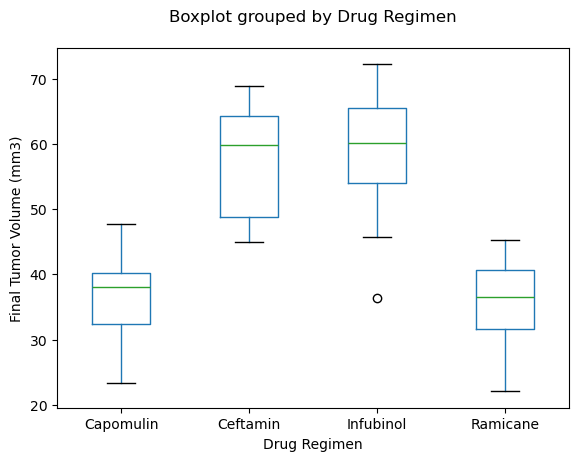

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
filtered_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen')
plt.title("")
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=0)
plt.grid(None)
plt.show()

## Line and Scatter Plots

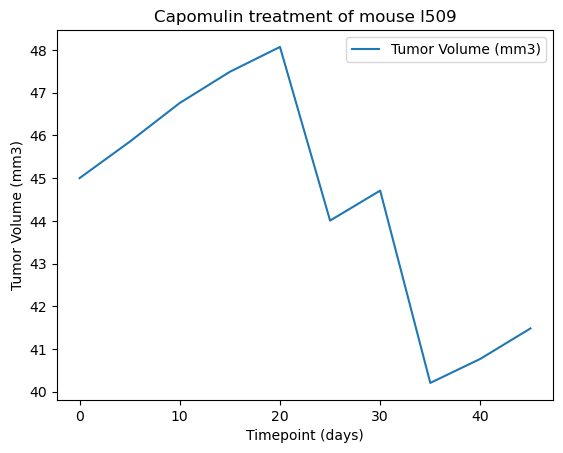

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_I509_df= clean_df[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]=="l509")]
#mouse_I509_df

mouse_I509_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.grid(False)  # Optional: Add gridlines
plt.show()

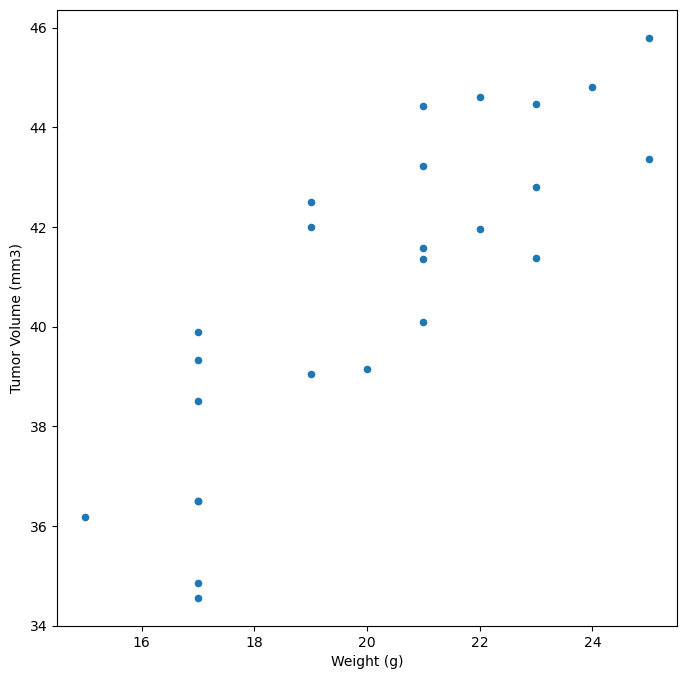

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
clean_df_Capomulin = clean_df[clean_df['Drug Regimen']=='Capomulin']
mean_tumor_volume_and_Weight = pd.DataFrame(clean_df_Capomulin.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean())
mean_tumor_volume_and_Weight = mean_tumor_volume_and_Weight.reset_index()
mean_tumor_volume_and_Weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),title="")
plt.show()

## Correlation and Regression

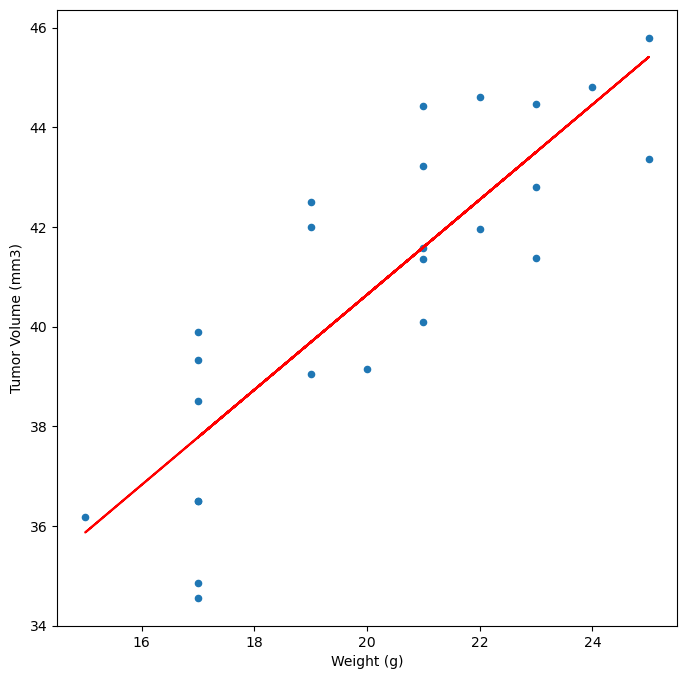

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
clean_df_Capomulin = clean_df[clean_df['Drug Regimen']=='Capomulin']
mean_tumor_volume_and_Weight = pd.DataFrame(clean_df_Capomulin.groupby(['Mouse ID','Weight (g)'])['Tumor Volume (mm3)'].mean())
mean_tumor_volume_and_Weight = mean_tumor_volume_and_Weight.reset_index()
weight = mean_tumor_volume_and_Weight[['Weight (g)']]
avg_vol = mean_tumor_volume_and_Weight[['Tumor Volume (mm3)']]
# Perform a linear regression on weight versus total volume
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
# Create equation of line to calculate predicted volume
pe_fit = pe_slope * weight + pe_int
mean_tumor_volume_and_Weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),title="")
plt.plot(weight,pe_fit,"-", c='r')
plt.show()
